<a href="https://colab.research.google.com/github/pranavi2013/AIML_2024/blob/main/big_mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

path = kagglehub.dataset_download("shivan118/big-mart-sales-prediction-datasets")
dataset_dir = '/root/.cache/kagglehub/datasets/shivan118/big-mart-sales-prediction-datasets/versions/1'

In [11]:
train_data = pd.read_csv(os.path.join(dataset_dir, "train.csv"))
test_data = pd.read_csv(os.path.join(dataset_dir, "test.csv"))

In [24]:
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (8523, 12)
Testing Data Shape: (5681, 11)


In [25]:
print("Training Data Info:")
print(train_data.info())
print("Testing Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Testing Data Info:
<

In [12]:
print("Missing Values in Training Data:")
print(train_data.isnull().sum())
print("Missing Values in Testing Data:")
print(test_data.isnull().sum())

Missing Values in Training Data:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Missing Values in Testing Data:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [13]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

<ipython-input-13-edccc5e9d1e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
<ipython-input-13-edccc5e9d1e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [26]:
print("Training Data First 5 Rows:")
print(train_data.head())
print("Testing Data First 5 Rows:")
print(test_data.head())

Training Data First 5 Rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999   

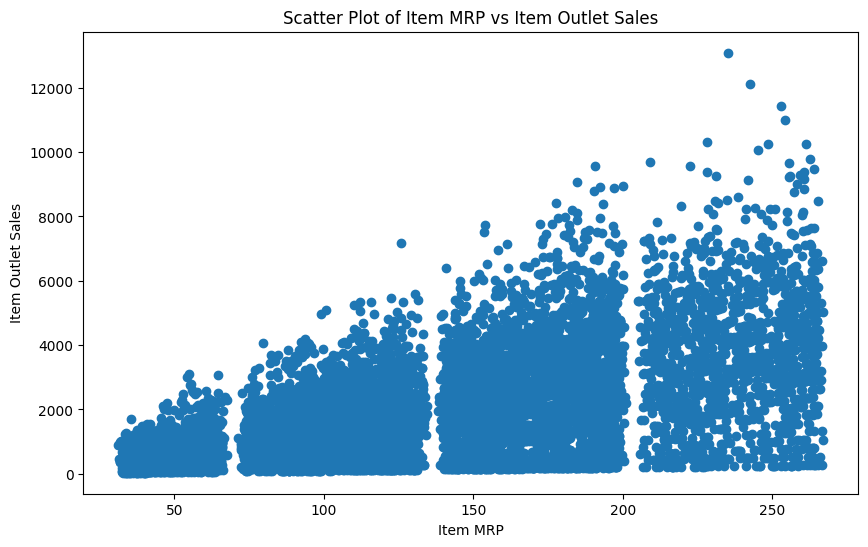

In [14]:
  plt.figure(figsize=(10, 6))
plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'])
plt.title('Scatter Plot of Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

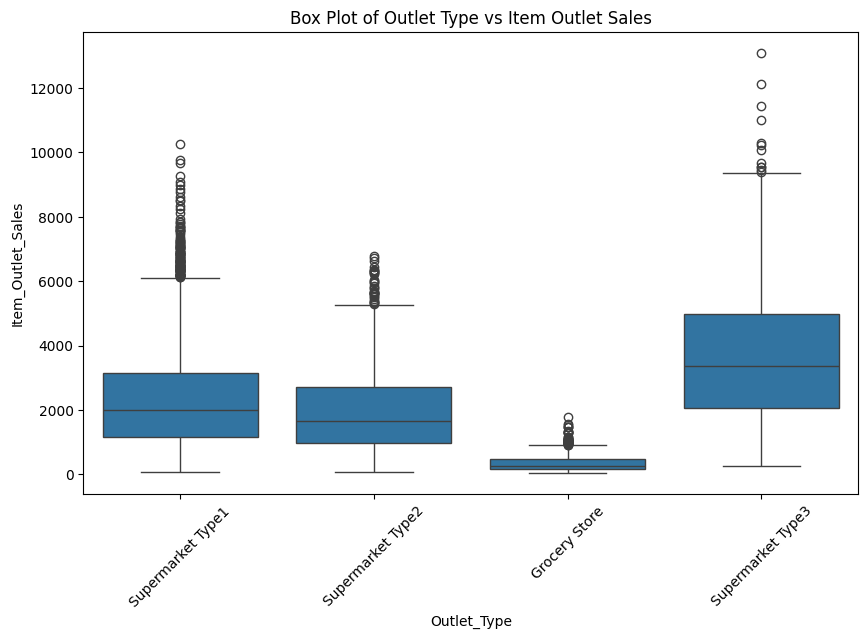

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Box Plot of Outlet Type vs Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

In [16]:
X = train_data[['Item_MRP', 'Item_Weight', 'Item_Visibility']]
y = train_data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 994.7690311720573
MSE: 1792623.0638421094
R2 Score: 0.3404551853385447


In [18]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 1037.528507088563
MSE: 2023950.3598157777
R2 Score: 0.2553448675999759


In [19]:
Q1 = train_data['Item_Outlet_Sales'].quantile(0.25)
Q3 = train_data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = train_data[(train_data['Item_Outlet_Sales'] >= Q1 - 1.5 * IQR) & (train_data['Item_Outlet_Sales'] <= Q3 + 1.5 * IQR)]


In [27]:
X_filtered = filtered_data[['Item_MRP', 'Item_Weight', 'Item_Visibility']]
y_filtered = filtered_data['Item_Outlet_Sales']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


In [28]:
lr_model.fit(X_train_f, y_train_f)
y_pred_lr_f = lr_model.predict(X_test_f)
print("Linear Regression Performance (after outlier removal):")
print("MAE:", mean_absolute_error(y_test_f, y_pred_lr_f))
print("MSE:", mean_squared_error(y_test_f, y_pred_lr_f))
print("R2 Score:", r2_score(y_test_f, y_pred_lr_f))


Linear Regression Performance (after outlier removal):
MAE: 946.9170236599243
MSE: 1504731.1022359645
R2 Score: 0.3313588673827321


In [29]:
rf_model.fit(X_train_f, y_train_f)
y_pred_rf_f = rf_model.predict(X_test_f)
print("Random Forest Performance (after outlier removal):")
print("MAE:", mean_absolute_error(y_test_f, y_pred_rf_f))
print("MSE:", mean_squared_error(y_test_f, y_pred_rf_f))
print("R2 Score:", r2_score(y_test_f, y_pred_rf_f))


Random Forest Performance (after outlier removal):
MAE: 984.8856518932853
MSE: 1691239.4546375663
R2 Score: 0.24848216216471786


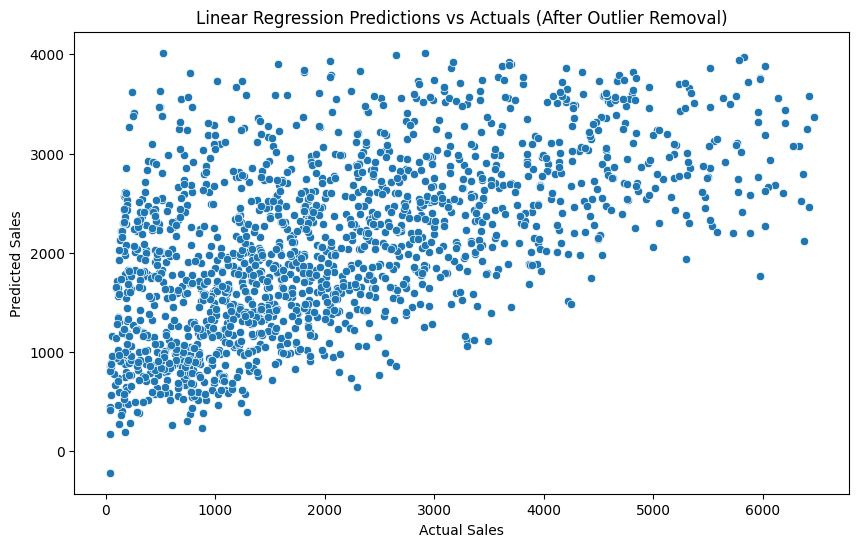

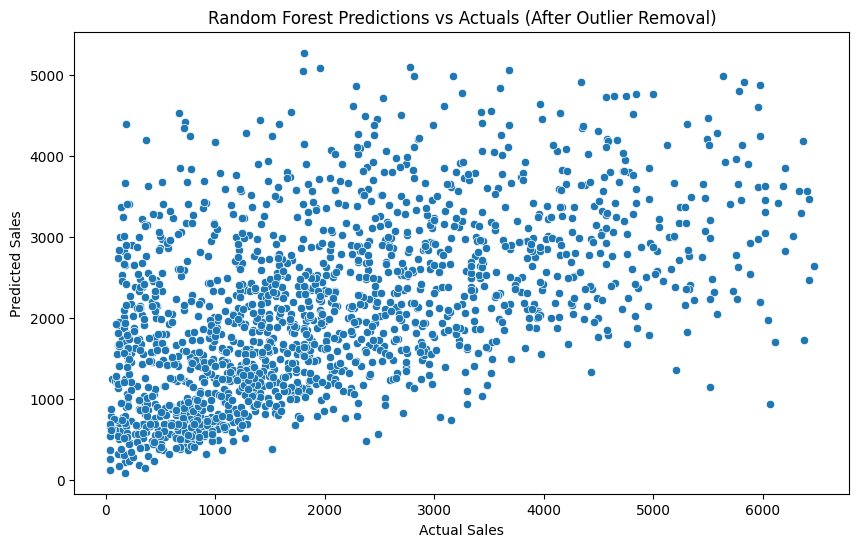

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_lr_f)
plt.title('Linear Regression Predictions vs Actuals (After Outlier Removal)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_rf_f)
plt.title('Random Forest Predictions vs Actuals (After Outlier Removal)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

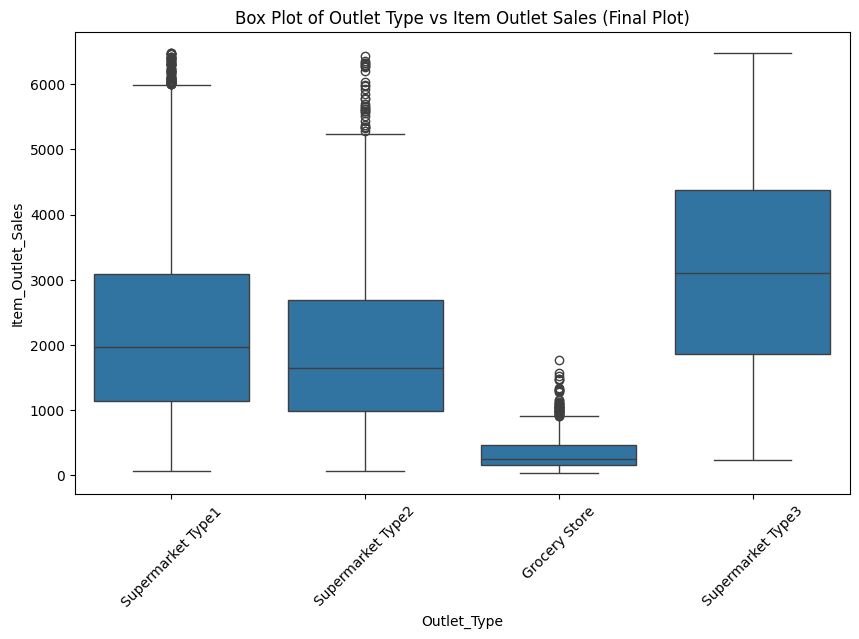

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=filtered_data)
plt.title('Box Plot of Outlet Type vs Item Outlet Sales (Final Plot)')
plt.xticks(rotation=45)
plt.show()